In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [160]:
data=pd.read_csv("/content/heart_disease.csv")

In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


#Data Cleaning and Preprocessing

Dropping duplicates

In [162]:
data.duplicated().sum()

np.int64(723)

In [163]:
data.drop_duplicates(inplace=True)

Finding and replacing missing values

In [164]:
data.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


Numerical and Categorical Seperation

In [165]:
num_df=data.select_dtypes(include="number")
cat_df=data.select_dtypes(include="object")

Checking for outliers

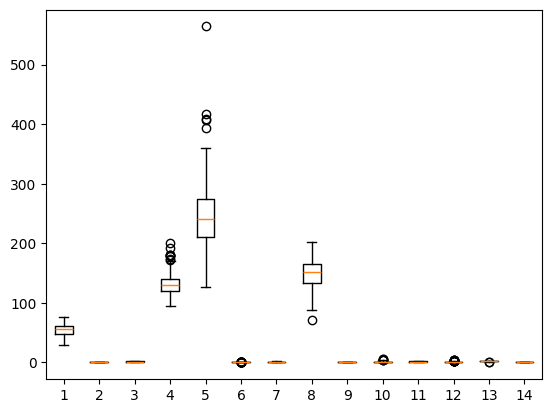

In [166]:
plt.boxplot(num_df)
plt.show()

Distribution of categorical variables.

In [167]:
num_cols= num_df.columns.tolist()

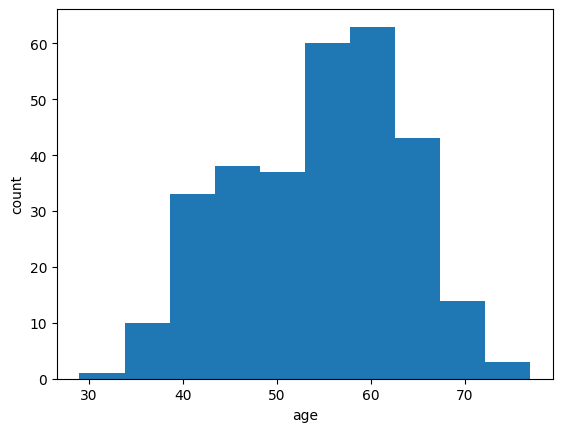

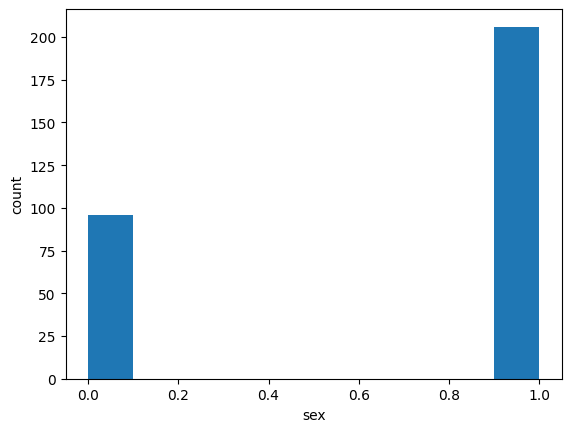

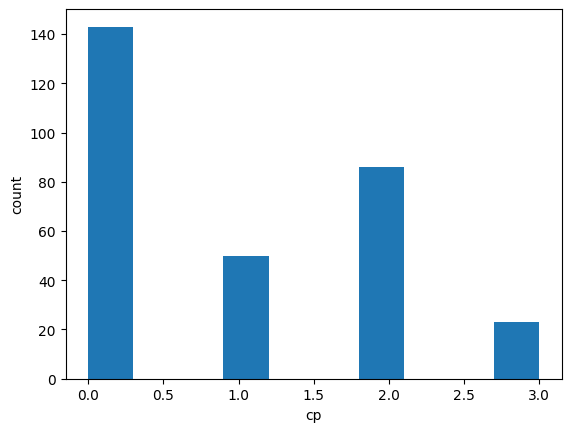

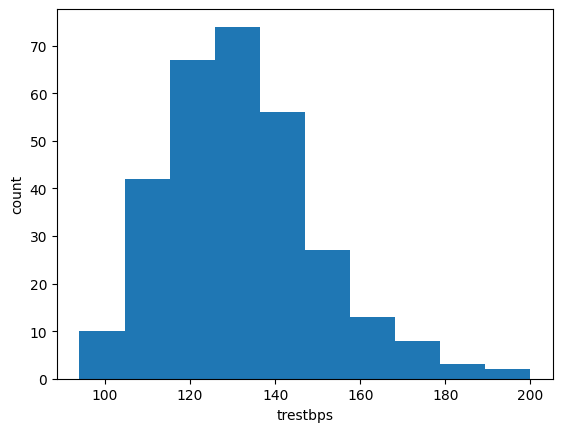

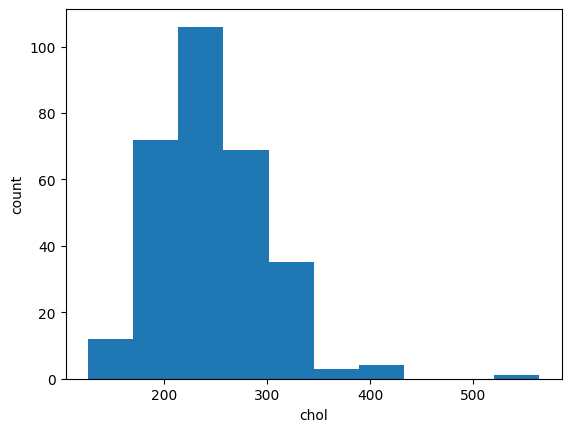

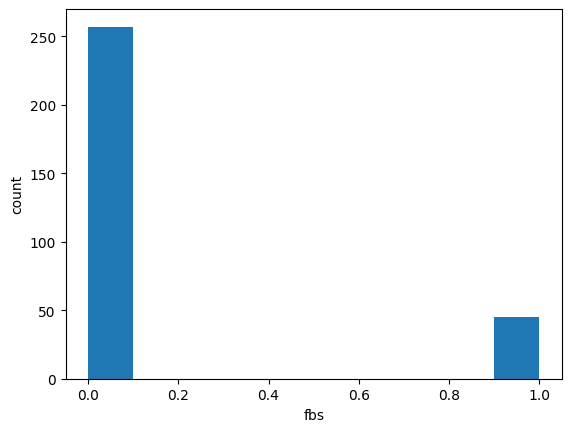

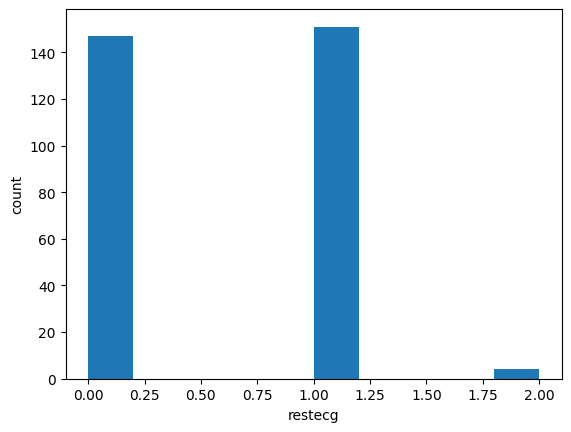

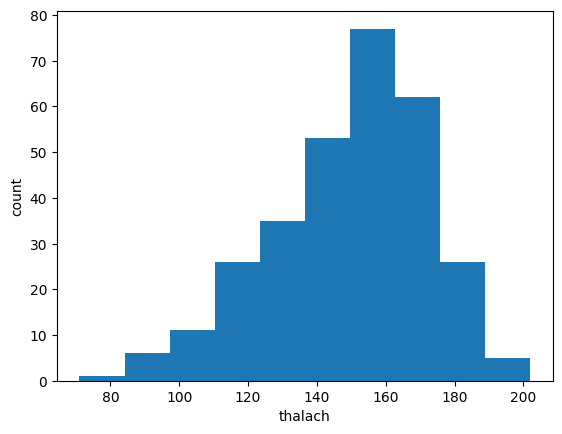

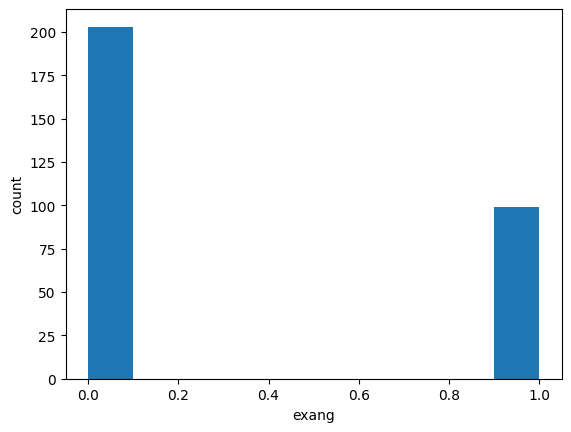

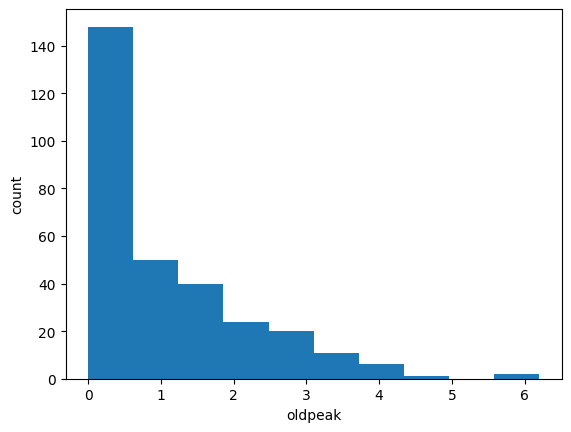

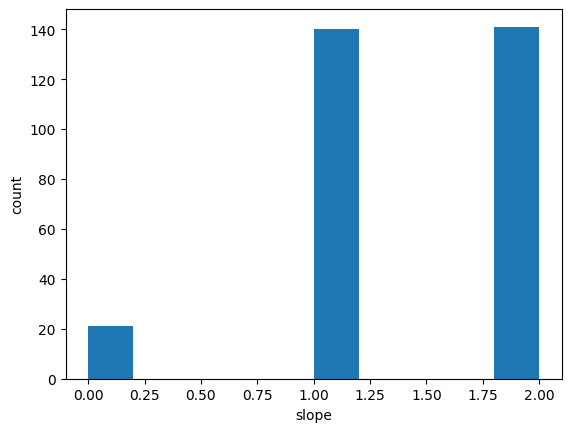

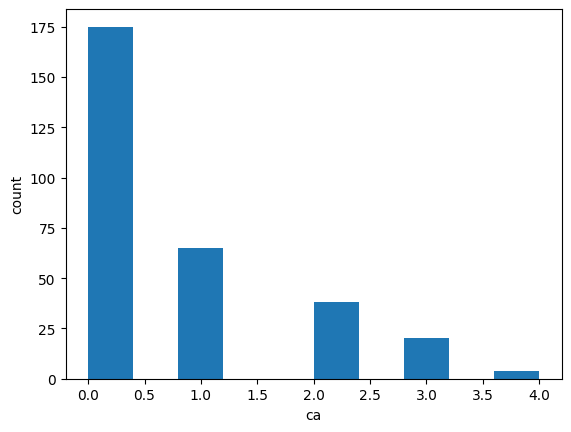

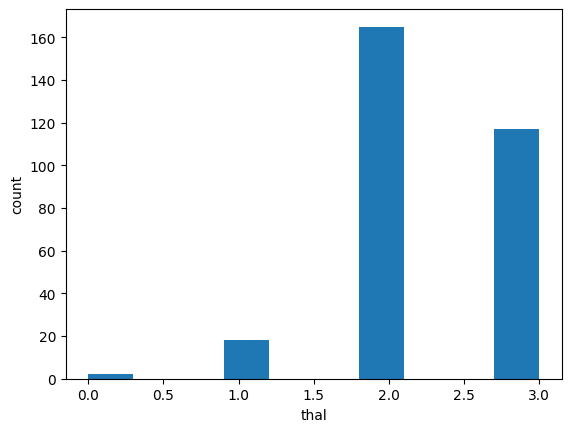

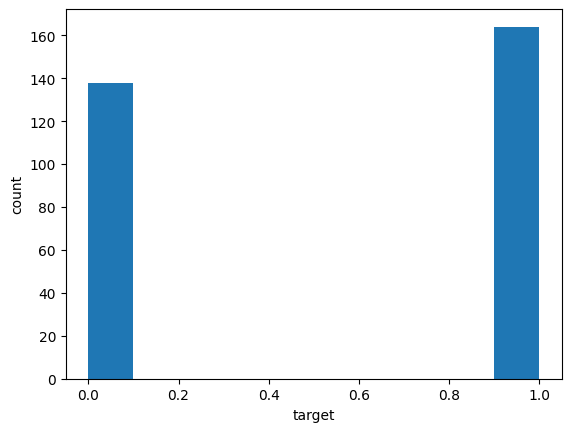

In [168]:
for col in num_cols:
  plt.hist(num_df[col])
  plt.xlabel(col)
  plt.ylabel('count')
  plt.show()

Handling Outliers

In [169]:
def clip_outliers(df,column_name):
  q1=df[column_name].quantile(0.25)
  q3=df[column_name].quantile(0.75)
  iqr=q3 - q1
  upper_bound=q3 + 1.5 * iqr
  lower_bound=q1 - 1.5 * iqr
  df[column_name]=df[column_name].clip(upper=upper_bound)
  df[column_name]=df[column_name].clip(lower=lower_bound)
  return df[column_name]

In [170]:
for col in num_cols:
  num_df[col]=clip_outliers(num_df,col)

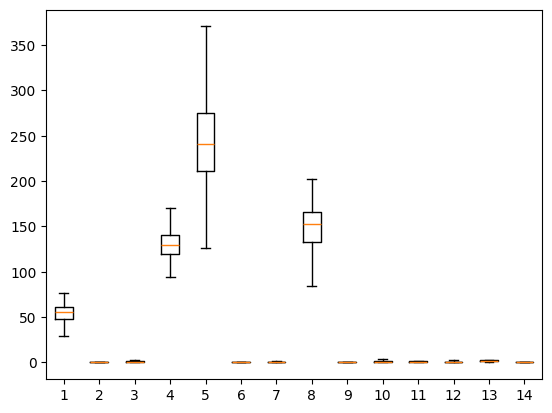

In [171]:
plt.boxplot(num_df)
plt.show()

Encoding

In [172]:
data = pd.get_dummies(data, columns=['cp', 'restecg', 'thal'], drop_first=True,dtype=int)

In [173]:
data.head(2)

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,target,cp_1,cp_2,cp_3,restecg_1,restecg_2,thal_1,thal_2,thal_3
0,52,1,125,212,0,168,0,1.0,2,2,0,0,0,0,1,0,0,0,1
1,53,1,140,203,1,155,1,3.1,0,0,0,0,0,0,0,0,0,0,1


Scaling

In [174]:
from sklearn.preprocessing import StandardScaler

In [175]:
scaler = StandardScaler()
num_cols = ['trestbps', 'chol', 'thalach', 'oldpeak']

data[num_cols] = scaler.fit_transform(data[num_cols])

In [176]:
data.head(2)

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,target,cp_1,cp_2,cp_3,restecg_1,restecg_2,thal_1,thal_2,thal_3
0,52,1,-0.376556,-0.667728,0,0.806035,0,-0.037124,2,2,0,0,0,0,1,0,0,0,1
1,53,1,0.478910,-0.841918,1,0.237495,1,1.773958,0,0,0,0,0,0,0,0,0,0,1


Train-Test-Split

In [177]:
Xr=data.drop('chol',axis=1) #for regression
yr=data["chol"]

In [178]:
from sklearn.model_selection import train_test_split
Xr_train,Xr_test,yr_train,yr_test=train_test_split(Xr,yr, test_size=0.2, random_state=42)

In [179]:
Xc=data.drop('target',axis=1) #for classifier
yc=data["target"]

In [180]:
Xc_train,Xc_test,yc_train,yc_test=train_test_split(Xc,yc, test_size=0.2, random_state=42)

Building machine learning models

Regression

In [181]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [182]:
lr_model = LinearRegression()
svr_model = SVR()
rf_model = RandomForestRegressor()

In [183]:
lr_model.fit(Xr_train, yr_train)
svr_model.fit(Xr_train, yr_train)
rf_model.fit(Xr_train, yr_train)

RandomForestRegressor()

Classifier

In [184]:
log_model = LogisticRegression()
knn_model = KNeighborsClassifier()
rfc_model = RandomForestClassifier()

In [185]:
log_model.fit(Xc_train, yc_train)
knn_model.fit(Xc_train, yc_train)
rfc_model.fit(Xc_train, yc_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier()

Evaluate Models on Test Data

Regression

In [186]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,accuracy_score, precision_score, recall_score, f1_score

In [187]:
lr_pred = lr_model.predict(Xr_test)
svr_pred = svr_model.predict(Xr_test)
rf_pred = rf_model.predict(Xr_test)

In [188]:
def evaluate_regression(y_true, y_pred, name):
    print(f"\n{name}")
    print("MAE :", mean_absolute_error(y_true, y_pred))
    print("MSE :", mean_squared_error(y_true, y_pred))
    print("R²  :", r2_score(y_true, y_pred))

In [189]:
evaluate_regression(yr_test, lr_pred, "Linear Regression")
evaluate_regression(yr_test, svr_pred, "SVR")
evaluate_regression(yr_test, rf_pred, "Random Forest")


Linear Regression
MAE : 0.6891319053368964
MSE : 0.8246480651204405
R²  : -0.20011217144830562

SVR
MAE : 0.6188198231830979
MSE : 0.6553569895633571
R²  : 0.046257509009209

Random Forest
MAE : 0.6637493890834658
MSE : 0.7959657786962769
R²  : -0.15837077593847915


Classifier

In [190]:
log_pred = log_model.predict(Xc_test)
knn_pred = knn_model.predict(Xc_test)
rfc_pred = rfc_model.predict(Xc_test)

In [191]:
def evaluate_classification(y_true, y_pred, name):
    print(f"\n{name}")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall   :", recall_score(y_true, y_pred))
    print("F1 Score :", f1_score(y_true, y_pred))

In [192]:
evaluate_classification(yc_test, log_pred, "Logistic Regression")
evaluate_classification(yc_test, knn_pred, "KNN")
evaluate_classification(yc_test, rfc_pred, "Random Forest")


Logistic Regression
Accuracy : 0.7540983606557377
Precision: 0.7058823529411765
Recall   : 0.8275862068965517
F1 Score : 0.7619047619047619

KNN
Accuracy : 0.7049180327868853
Precision: 0.6410256410256411
Recall   : 0.8620689655172413
F1 Score : 0.7352941176470589

Random Forest
Accuracy : 0.819672131147541
Precision: 0.78125
Recall   : 0.8620689655172413
F1 Score : 0.819672131147541


Regression Table

In [193]:
regression_results = pd.DataFrame({
    'Model': ['Linear Regression', 'SVR', 'Random Forest'],
    'MAE': [mean_absolute_error(yr_test, lr_pred),mean_absolute_error(yr_test, svr_pred),mean_absolute_error(yr_test, rf_pred)],
    'MSE': [mean_squared_error(yr_test, lr_pred),mean_squared_error(yr_test, svr_pred),mean_squared_error(yr_test, rf_pred)],
    'R2 Score': [r2_score(yr_test, lr_pred),r2_score(yr_test, svr_pred),r2_score(yr_test, rf_pred)]})

print("Regression Model Evaluation:\n")
print(regression_results.sort_values(by="R2 Score", ascending=False))

Regression Model Evaluation:

               Model       MAE       MSE  R2 Score
1                SVR  0.618820  0.655357  0.046258
2      Random Forest  0.663749  0.795966 -0.158371
0  Linear Regression  0.689132  0.824648 -0.200112


Classification Table

In [194]:
classification_results = pd.DataFrame({'Model': ['Logistic Regression', 'KNN', 'Random Forest'],
    'Accuracy': [accuracy_score(yc_test, log_pred),accuracy_score(yc_test, knn_pred),accuracy_score(yc_test, rfc_pred)],
    'Precision': [precision_score(yc_test, log_pred),precision_score(yc_test, knn_pred),precision_score(yc_test, rfc_pred)],
    'Recall': [recall_score(yc_test, log_pred),recall_score(yc_test, knn_pred),recall_score(yc_test, rfc_pred)],
    'F1 Score': [f1_score(yc_test, log_pred),f1_score(yc_test, knn_pred),f1_score(yc_test, rfc_pred)]})

print("\nClassification Model Evaluation:\n")
print(classification_results.sort_values(by="Recall", ascending=False))


Classification Model Evaluation:

                 Model  Accuracy  Precision    Recall  F1 Score
1                  KNN  0.704918   0.641026  0.862069  0.735294
2        Random Forest  0.819672   0.781250  0.862069  0.819672
0  Logistic Regression  0.754098   0.705882  0.827586  0.761905


Best Models

In [195]:
best_reg = regression_results.loc[regression_results['R2 Score'].idxmax(), 'Model']
best_clf = classification_results.loc[classification_results['Recall'].idxmax(), 'Model']

print(f"\nBest Regression Model: {best_reg}")
print(f"Best Classification Model: {best_clf}")


Best Regression Model: SVR
Best Classification Model: KNN
